In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rounddf=pd.read_csv("Dades/Climate game/round.csv")
sessiondf=pd.read_csv("Dades/Climate game/session.csv")
userdf=pd.read_csv("Dades/Climate game/user.csv")
userrounddf=pd.read_csv("Dades/Climate game/userround.csv")
userdf

,id,gender,age,study_level,prfinal1,prfinal2,prfinal3,prfinal4,prfinal5,prfinal6,...,prfinal11,prfinal12,prfinal13,ended,start_capital,end_capital,partida_id,prfinal14,prfinal15,winnings
0,1,d,28.0,r4,r1,r1,r4,r2,r2,r1,...,r4,r3,r2,1.0,40.0,12.0,1.0,r3,r2,12.0
1,2,h,45.0,r4,r1,r1,r1,r2,r3,r1,...,r3,r1,r2,1.0,40.0,14.0,1.0,r2,r2,14.0
2,3,h,15.0,r2,r1,r1,r2,r3,r1,r1,...,r3,r3,r2,1.0,40.0,28.0,1.0,r4,r4,28.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,h,24.0,r6,r1,r2,r2,r3,r3,r1,...,r3,r3,r2,1.0,30.0,10.0,2.0,r3,r4,10.0
5,6,d,14.0,r2,r1,r2,r2,r3,r3,r1,...,r3,r3,r3,1.0,40.0,16.0,1.0,r1,r3,16.0
6,7,h,14.0,r2,r1,r2,r2,r3,r3,r1,...,r3,r3,r1,1.0,40.0,26.0,1.0,r3,r4,26.0
7,8,d,16.0,r4,r1,r3,r1,r3,r3,r1,...,r3,r3,r2,1.0,40.0,13.0,1.0,r2,r3,13.0
8,9,d,25.0,r4,r1,r2,r1,r2,r3,r3,...,r1,r3,r2,1.0,20.0,0.0,2.0,r2,r3,0.0
9,10,d,15.0,r2,r1,r1,r2,r3,r3,r3,...,r4,r4,r3,1.0,40.0,10.0,2.0,r4,r3,10.0


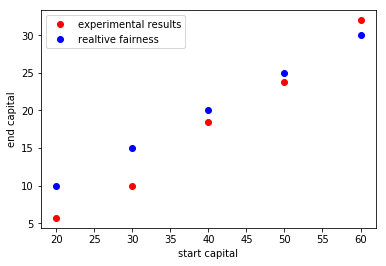

In [49]:
scvector=[20.0,30.0,40.0,50.0,60.0]
sumvector=[0.0,0.0,0.0,0.0,0.0]
counter=[0,0,0,0,0]
for i in range(len(userdf)):
    for k in range(5):
        if (userdf.loc[i,"start_capital"]==scvector[k]):
            sumvector[k]=sumvector[k]+userdf.loc[i,"end_capital"]
            counter[k]=counter[k]+1
for k in range(5):
    sumvector[k]=sumvector[k]/float(counter[k])
plt.plot(scvector,sumvector,"ro",label="experimental results")
fairvector=list(range(5))
for i in range(5):
    fairvector[i]=0.5*scvector[i]
plt.plot(scvector,fairvector,"bo",label="realtive fairness")
plt.xlabel("start capital")
plt.ylabel("end capital")
plt.legend()

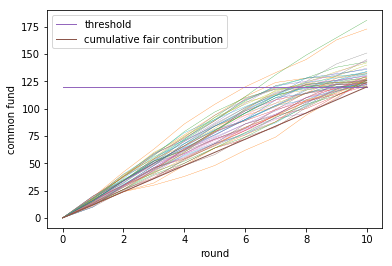

In [44]:
roundi=list(range(0,11))
roundlist=(0,1,2,3,4,5,6,7,8,9,10)
for i in range(1,55):
    roundi=rounddf.loc[rounddf["session_id"]==i]
    roundi=roundi[["end_pot"]]
    roundi.index=roundi.index%10
    roundi.loc[-1] = [120]
    roundi.index = roundi.index + 1
    roundi.sort_index(inplace=True)
    for j in range (0,11):
        roundi.loc[j]=120-roundi.loc[j]
    plt.plot(roundlist,roundi,lw=0.3)
plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
plt.xlabel("round")
plt.ylabel("common fund")
plt.legend()

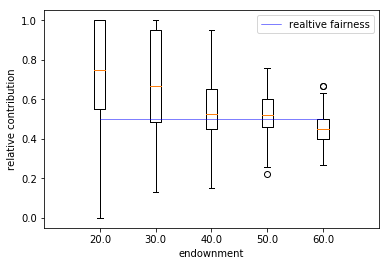

In [24]:
scvect=[20.0,30.0,40.0,50.0,60.0]
rcvect=[0.0,0.0,0.0,0.0,0.0]
data=[[],[],[],[],[]]
for k in range(5):
    for i in range(len(userdf)):
        if (userdf.loc[i,"start_capital"]==scvect[k]):
            data[k].append(1-userdf.loc[i,"winnings"]/scvect[k])
plt.boxplot(data,positions=scvect,widths=2)
fairvector=(0.5,0.5,0.5,0.5,0.5)
plt.plot(scvect,fairvector,"b-",lw=0.5,label="realtive fairness")
plt.xlabel("endownment")
plt.ylabel("relative contribution")
plt.xlim([10.0,70.0])
plt.legend()

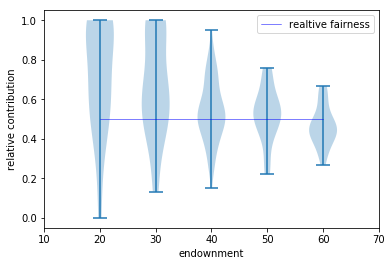

In [26]:
scvect=[20.0,30.0,40.0,50.0,60.0]
rcvect=[0.0,0.0,0.0,0.0,0.0]
data=[[],[],[],[],[]]
for k in range(5):
    for i in range(len(userdf)):
        if (userdf.loc[i,"start_capital"]==scvect[k]):
            data[k].append(1-userdf.loc[i,"winnings"]/scvect[k])
plt.violinplot(data,positions=scvect,widths=5)
fairvector=(0.5,0.5,0.5,0.5,0.5)
plt.plot(scvect,fairvector,"b-",lw=0.5,label="realtive fairness")
plt.xlabel("endownment")
plt.ylabel("relative contribution")
plt.xlim([10.0,70.0])
plt.legend()